## Libraries

In [1]:
import numpy as np
import cv2 as cv
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import NullLocator
import matplotlib.image as mpimg

## Read image

In [2]:
apple = mpimg.imread('Images/Apple.png')
orange = mpimg.imread('Images/Orange.png')

## Plotting image

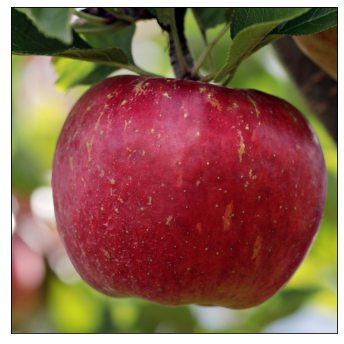

In [3]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(apple)

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

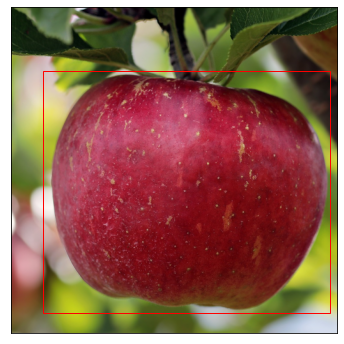

In [4]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(apple)

rect = patches.Rectangle((50, 100), 450, 380, 
                         linewidth=1, 
                         edgecolor='r', 
                         facecolor='none')

ax.add_patch(rect)

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

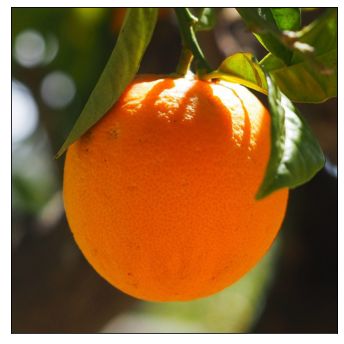

In [5]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(orange)

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

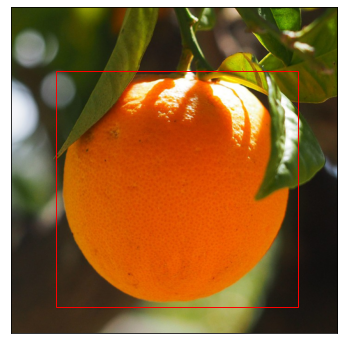

In [6]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(orange)

rect = patches.Rectangle((70, 100), 380, 370, 
                         linewidth=1, 
                         edgecolor='r', 
                         facecolor='none')

ax.add_patch(rect)

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

## Apply gravcut

In [7]:
mask = np.zeros(apple.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (50,100,450,380)

mask, bgdModel, fgdModel = cv.grabCut(
    (apple*255).astype(np.uint8),mask,rect,
    bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1)
apple_cut = apple * mask2[:,:,np.newaxis]

In [8]:
mask = np.zeros(orange.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (70,100,380,370)

mask, bgdModel, fgdModel = cv.grabCut(
    (orange*255).astype(np.uint8),mask,rect,
    bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1)
orange_cut = orange * mask2[:,:,np.newaxis]

## Plotting image after gravcut

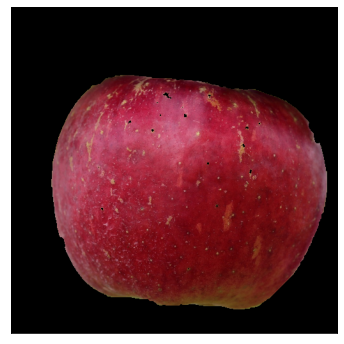

In [9]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(apple_cut)

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

plt.savefig("Results/apple_cut.pdf", bbox_inches = 'tight')

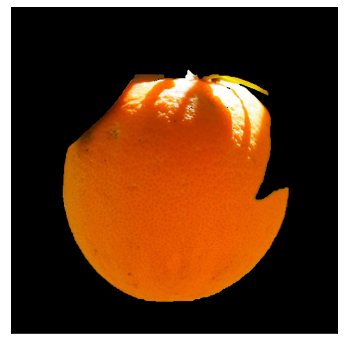

In [10]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(orange_cut)

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

plt.savefig("Results/orange_cut.pdf", bbox_inches = 'tight')